In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [11]:
df["optimizer.learning_rate"] = df["optimizer.learning_rate"].astype('float64')

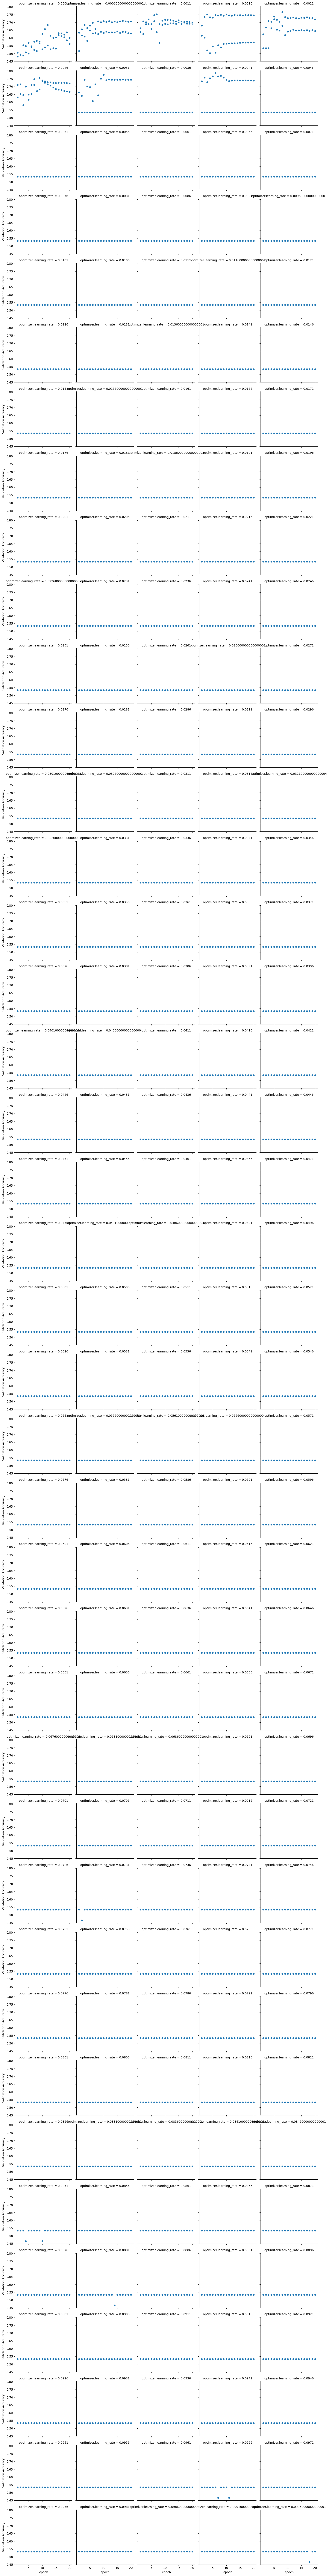

In [12]:
import seaborn as sns

g = sns.FacetGrid(df, col='optimizer.learning_rate', col_wrap= 5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Validation Accuracy')

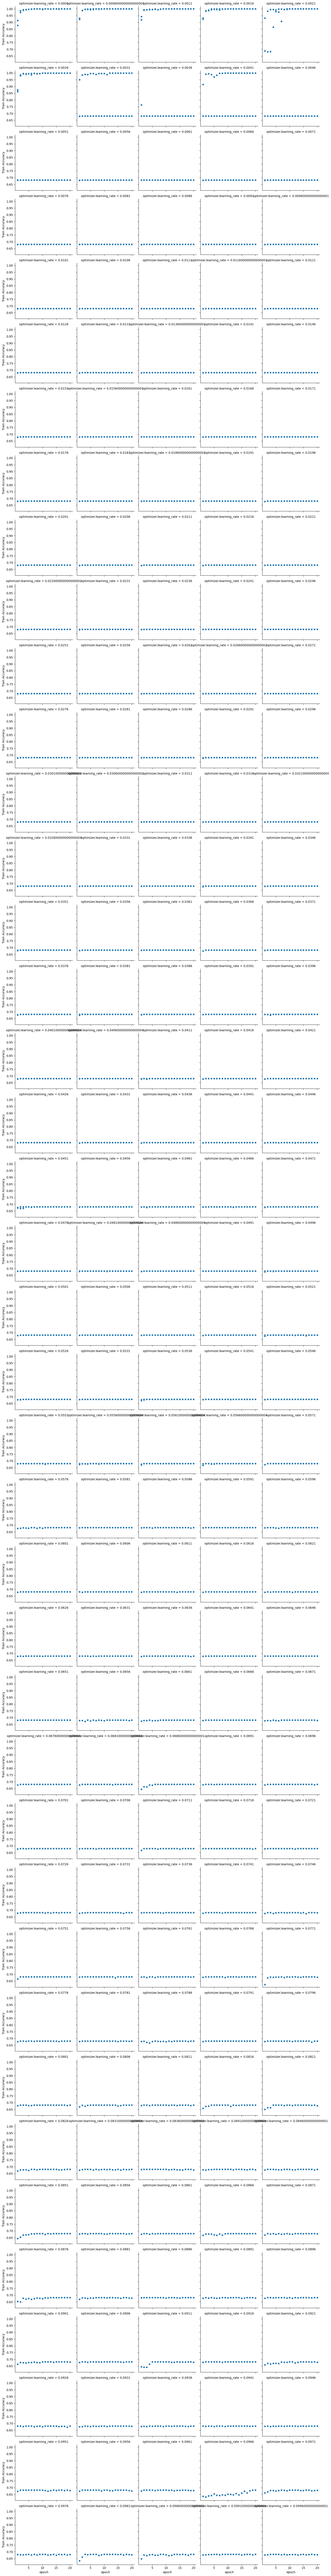

In [13]:
import seaborn as sns

g = sns.FacetGrid(df, col='optimizer.learning_rate', col_wrap= 5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy')